* https://towardsdatascience.com/sequence-embedding-for-clustering-and-classification-f816a66373fb

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline
import sgt
#print(sgt.__version__)
from sgt import SGT

In [2]:
# Learning a sgt embedding as a matrix with 
# rows and columns as the sequence alphabets. 
# This embedding shows the relationship between 
# the alphabets. The higher the value the 
# stronger the relationship.

sgt = SGT(flatten=False)
sequence = np.array(["B","B","A","C","A","C","A","A","B","A"])
sgt.fit(sequence)

,A,B,C
A,0.090616,0.131002,0.261849
B,0.086569,0.123042,0.052544
C,0.137142,0.028263,0.135335


In [3]:
# SGT embedding to a vector. The vector
# embedding is useful for directly applying
# a machine learning algorithm.

sgt = SGT(flatten=True)
sequence = np.array(["B","B","A","C","A","C","A","A","B","A"])
sgt.fit(sequence)

(A, A)    0.090616
(A, B)    0.131002
(A, C)    0.261849
(B, A)    0.086569
(B, B)    0.123042
(B, C)    0.052544
(C, A)    0.137142
(C, B)    0.028263
(C, C)    0.135335
dtype: float64

In [4]:
'''
SGT embedding on a corpus of sequences.
Test the two processing modes within the
SGT class: 'default', 'multiprocessing'.

'''

# A sample corpus of two sequences.
corpus = pd.DataFrame([[1, ["B","B","A","C","A","C","A","A","B","A"]], 
                       [2, ["C", "Z", "Z", "Z", "D"]]], 
                      columns=['id', 'sequence'])
corpus

,id,sequence
0,1,"[B, B, A, C, A, C, A, A, B, A]"
1,2,"[C, Z, Z, Z, D]"


In [5]:
# Learning the sgt embeddings as vector for
# all sequences in a corpus.
# mode: 'default'
sgt = SGT(kappa=1, 
          flatten=True, 
          lengthsensitive=False, 
          mode='default')
sgt.fit_transform(corpus)

,id,"(A, A)","(A, B)","(A, C)","(A, D)","(A, Z)","(B, A)","(B, B)","(B, C)","(B, D)",...,"(D, A)","(D, B)","(D, C)","(D, D)","(D, Z)","(Z, A)","(Z, B)","(Z, C)","(Z, D)","(Z, Z)"
0,1.0,0.090616,0.131002,0.261849,0.0,0.0,0.086569,0.123042,0.052544,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184334,0.290365


## Start

In [6]:
# Loading data
data = pd.read_csv('../data/bioinformatics/proteome/protein_classification.txt')
print(data.columns)

Index(['Entry', 'Entry name', 'Status', 'Protein names', 'Gene names',
       'Organism', 'Length', 'Sequence', 'Function [CC]', 'Features',
       'Taxonomic lineage (all)', 'Protein families'],
      dtype='object')


In [7]:
data['Protein families'].value_counts()

UPF0122 family      1133
YbaB/EbfC family     979
Name: Protein families, dtype: int64

In [8]:
data['Function [CC]'].value_counts()

FUNCTION: Might take part in the signal recognition particle (SRP) pathway. This is inferred from the conservation of its genetic proximity to ftsY/ffh. May be a regulatory protein. {ECO:0000256|HAMAP-Rule:MF_00245, ECO:0000256|SAAS:SAAS00055505}.    1133
FUNCTION: Binds to DNA and alters its conformation. May be involved in regulation of gene expression, nucleoid organization and DNA protection. {ECO:0000256|HAMAP-Rule:MF_00274, ECO:0000256|SAAS:SAAS00090180}.                                           979
Name: Function [CC], dtype: int64

In [9]:
data.head()

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Sequence,Function [CC],Features,Taxonomic lineage (all),Protein families
0,M7MCX3,M7MCX3_STREE,unreviewed,UPF0122 protein PCS8235_00989,PCS8235_00989,Streptococcus pneumoniae PCS8235,110,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEFG...,FUNCTION: Might take part in the signal recogn...,NaN,"cellular organisms, Bacteria, Firmicutes, Baci...",UPF0122 family
1,K6PL84,K6PL84_LACCA,unreviewed,UPF0122 protein LCA12A_1280,LCA12A_1280,Lactobacillus casei 12A,113,MEIEKNYRMNSLFEFYGPLLTDKQHAYLALYYGDDYSLGEIATEFN...,FUNCTION: Might take part in the signal recogn...,NaN,"cellular organisms, Bacteria, Firmicutes, Baci...",UPF0122 family
2,R4W5V3,R4W5V3_STRIN,unreviewed,UPF0122 protein K710_1051,K710_1051,Streptococcus iniae SF1,110,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEYG...,FUNCTION: Might take part in the signal recogn...,NaN,"cellular organisms, Bacteria, Firmicutes, Baci...",UPF0122 family
3,T2A126,T2A126_STRAP,unreviewed,UPF0122 protein SANR_1020,SANR_1020,Streptococcus anginosus C238,110,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEFQ...,FUNCTION: Might take part in the signal recogn...,NaN,"cellular organisms, Bacteria, Firmicutes, Baci...",UPF0122 family
4,L0SHD5,L0SHD5_STREE,unreviewed,UPF0122 protein SPN994039_11430,SPN994039_11430,Streptococcus pneumoniae SPN994039,110,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEFG...,FUNCTION: Might take part in the signal recogn...,NaN,"cellular organisms, Bacteria, Firmicutes, Baci...",UPF0122 family


In [10]:
data.tail()

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Sequence,Function [CC],Features,Taxonomic lineage (all),Protein families
2107,A0A081R612,A0A081R612_STROR,unreviewed,Nucleoid-associated protein SK141_0947,SK141_0947 SK143_0690,Streptococcus oralis,99,MMNMQNMMRQAQKLQKQMEQSQAELAAMEFVGKSAQDLVQATLTGD...,FUNCTION: Binds to DNA and alters its conforma...,NaN,"cellular organisms, Bacteria, Firmicutes, Baci...",YbaB/EbfC family
2108,A0A081QQM2,A0A081QQM2_STRMT,unreviewed,Nucleoid-associated protein SK271_1043,SK271_1043 SK578_1343 SK608_0961 SK637_1140 SK...,Streptococcus mitis,99,MMNMQNMMRQAQKLQKQMEQSQAELAAMQFVGKSAQDLVQATLTGD...,FUNCTION: Binds to DNA and alters its conforma...,NaN,"cellular organisms, Bacteria, Firmicutes, Baci...",YbaB/EbfC family
2109,J1A517,J1A517_STREE,unreviewed,Nucleoid-associated protein SPAR159_1165,SPAR159_1165 SPAR159_1186,Streptococcus pneumoniae GA56348,93,MMRQAQKLQKQMEQSQAELAAMQFVGKSAQDLVQATLTGDKKVISI...,FUNCTION: Binds to DNA and alters its conforma...,NaN,"cellular organisms, Bacteria, Firmicutes, Baci...",YbaB/EbfC family
2110,F5U1T6,F5U1T6_STRAP,unreviewed,Nucleoid-associated protein ANG1_1640,ANG1_1640 HMPREF9966_0011,Streptococcus anginosus SK52 = DSM 20563,99,MMNMQSMMKQAQKLQKQMEKGQAELAATKFVGKSAQDLVVATLTGD...,FUNCTION: Binds to DNA and alters its conforma...,NaN,"cellular organisms, Bacteria, Firmicutes, Baci...",YbaB/EbfC family
2111,J3A2T7,J3A2T7_STRRT,unreviewed,Nucleoid-associated protein D822_05626,D822_05626 SRA_07816,Streptococcus ratti FA-1 = DSM 20564,99,MMNMQNMMKQAQKLQKQMEKKQAELADTTFVGKSAQDLVVATFTGD...,FUNCTION: Binds to DNA and alters its conforma...,NaN,"cellular organisms, Bacteria, Firmicutes, Baci...",YbaB/EbfC family


In [11]:
data.index

RangeIndex(start=0, stop=2112, step=1)

In [12]:
corpus = data.loc[:,['Entry','Sequence']]
corpus

,Entry,Sequence
0,M7MCX3,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEFG...
1,K6PL84,MEIEKNYRMNSLFEFYGPLLTDKQHAYLALYYGDDYSLGEIATEFN...
2,R4W5V3,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEYG...
3,T2A126,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEFQ...
4,L0SHD5,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEFG...
...,...,...
2107,A0A081R612,MMNMQNMMRQAQKLQKQMEQSQAELAAMEFVGKSAQDLVQATLTGD...
2108,A0A081QQM2,MMNMQNMMRQAQKLQKQMEQSQAELAAMQFVGKSAQDLVQATLTGD...
2109,J1A517,MMRQAQKLQKQMEQSQAELAAMQFVGKSAQDLVQATLTGDKKVISI...
2110,F5U1T6,MMNMQSMMKQAQKLQKQMEKGQAELAATKFVGKSAQDLVVATLTGD...


In [13]:
# Data preprocessing
#corpus = corpus.loc[:,['Entry','Sequence']]
corpus.columns = ['id', 'sequence']
corpus

,id,sequence
0,M7MCX3,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEFG...
1,K6PL84,MEIEKNYRMNSLFEFYGPLLTDKQHAYLALYYGDDYSLGEIATEFN...
2,R4W5V3,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEYG...
3,T2A126,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEFQ...
4,L0SHD5,MEIEKTNRMNALFEFYAALLTDKQMNYIELYYADDYSLAEIAEEFG...
...,...,...
2107,A0A081R612,MMNMQNMMRQAQKLQKQMEQSQAELAAMEFVGKSAQDLVQATLTGD...
2108,A0A081QQM2,MMNMQNMMRQAQKLQKQMEQSQAELAAMQFVGKSAQDLVQATLTGD...
2109,J1A517,MMRQAQKLQKQMEQSQAELAAMQFVGKSAQDLVQATLTGDKKVISI...
2110,F5U1T6,MMNMQSMMKQAQKLQKQMEKGQAELAATKFVGKSAQDLVVATLTGD...


In [14]:
corpus['sequence'] = corpus['sequence'].map(list)
corpus

,id,sequence
0,M7MCX3,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
1,K6PL84,"[M, E, I, E, K, N, Y, R, M, N, S, L, F, E, F, ..."
2,R4W5V3,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
3,T2A126,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
4,L0SHD5,"[M, E, I, E, K, T, N, R, M, N, A, L, F, E, F, ..."
...,...,...
2107,A0A081R612,"[M, M, N, M, Q, N, M, M, R, Q, A, Q, K, L, Q, ..."
2108,A0A081QQM2,"[M, M, N, M, Q, N, M, M, R, Q, A, Q, K, L, Q, ..."
2109,J1A517,"[M, M, R, Q, A, Q, K, L, Q, K, Q, M, E, Q, S, ..."
2110,F5U1T6,"[M, M, N, M, Q, S, M, M, K, Q, A, Q, K, L, Q, ..."


In [15]:
%%time
# Compute SGT embeddings
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)

INFO: Pandarallel will run on 3 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
CPU times: user 132 ms, sys: 32.8 ms, total: 165 ms
Wall time: 11.2 s


In [16]:
sgtembedding_df

,id,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)",...,"(Y, M)","(Y, N)","(Y, P)","(Y, Q)","(Y, R)","(Y, S)","(Y, T)","(Y, V)","(Y, W)","(Y, Y)"
0,M7MCX3,0.020180,0.0,0.009635,0.013529,0.009360,0.003205,2.944887e-10,0.002226,0.000379,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
1,K6PL84,0.001604,0.0,0.012637,0.006323,0.006224,0.004819,3.560677e-03,0.001124,0.012136,...,0.135335,0.006568,0.038901,0.011298,0.012578,0.009913,0.001079,0.000023,0.0,0.007728
2,R4W5V3,0.012448,0.0,0.008408,0.016363,0.027469,0.003205,2.944887e-10,0.004249,0.013013,...,0.008114,0.007128,0.000000,0.000203,0.001757,0.022736,0.000249,0.012652,0.0,0.008533
3,T2A126,0.010545,0.0,0.012560,0.014212,0.013728,0.000000,2.944887e-10,0.007223,0.000309,...,0.000325,0.009669,0.000000,0.003182,0.001904,0.015607,0.000577,0.007479,0.0,0.008648
4,L0SHD5,0.020180,0.0,0.008628,0.015033,0.009360,0.003205,2.944887e-10,0.002226,0.000379,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,A0A081R612,0.014805,0.0,0.004159,0.017541,0.012701,0.013099,0.000000e+00,0.017043,0.004732,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2108,A0A081QQM2,0.010774,0.0,0.004283,0.014732,0.014340,0.014846,0.000000e+00,0.016806,0.005406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2109,J1A517,0.010774,0.0,0.004283,0.014732,0.014340,0.014846,0.000000e+00,0.014500,0.005406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2110,F5U1T6,0.015209,0.0,0.005175,0.023888,0.011410,0.011510,0.000000e+00,0.021145,0.009280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [17]:
# Set the id column as the dataframe index
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)","(A, L)",...,"(Y, M)","(Y, N)","(Y, P)","(Y, Q)","(Y, R)","(Y, S)","(Y, T)","(Y, V)","(Y, W)","(Y, Y)"
id,,,,,,,,,,,,,,,,,,,,,
M7MCX3,0.020180,0.0,0.009635,0.013529,0.009360,0.003205,2.944887e-10,0.002226,0.000379,0.021703,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
K6PL84,0.001604,0.0,0.012637,0.006323,0.006224,0.004819,3.560677e-03,0.001124,0.012136,0.018427,...,0.135335,0.006568,0.038901,0.011298,0.012578,0.009913,0.001079,0.000023,0.0,0.007728
R4W5V3,0.012448,0.0,0.008408,0.016363,0.027469,0.003205,2.944887e-10,0.004249,0.013013,0.031118,...,0.008114,0.007128,0.000000,0.000203,0.001757,0.022736,0.000249,0.012652,0.0,0.008533
T2A126,0.010545,0.0,0.012560,0.014212,0.013728,0.000000,2.944887e-10,0.007223,0.000309,0.028531,...,0.000325,0.009669,0.000000,0.003182,0.001904,0.015607,0.000577,0.007479,0.0,0.008648
L0SHD5,0.020180,0.0,0.008628,0.015033,0.009360,0.003205,2.944887e-10,0.002226,0.000379,0.021703,...,0.009196,0.007964,0.036788,0.000195,0.001513,0.020665,0.000542,0.007479,0.0,0.010419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A0A081R612,0.014805,0.0,0.004159,0.017541,0.012701,0.013099,0.000000e+00,0.017043,0.004732,0.014904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
A0A081QQM2,0.010774,0.0,0.004283,0.014732,0.014340,0.014846,0.000000e+00,0.016806,0.005406,0.014083,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
J1A517,0.010774,0.0,0.004283,0.014732,0.014340,0.014846,0.000000e+00,0.014500,0.005406,0.014083,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


### We perform PCA on the sequence embeddings and then do kmeans clustering.



In [18]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)

X=pca.transform(sgtembedding_df)

print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['x1', 'x2'])
df.head()

0.6432744907364976


,x1,x2
0,0.384913,-0.269873
1,0.022764,0.135995
2,0.177792,-0.172454
3,0.168074,-0.147334
4,0.383616,-0.271163


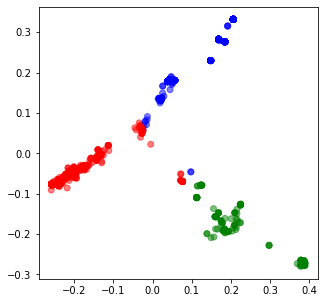

In [19]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

## Sequence Classification using Deep Learning in TensorFlow

In [20]:
from sklearn.preprocessing import LabelEncoder

# Loading data
data = pd.read_csv('../data/bioinformatics/proteome/protein_classification.txt')


# Data preprocessing
y = data['Function [CC]']
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

corpus = data.loc[:,['Entry','Sequence']]
corpus.columns = ['id', 'sequence']
corpus['sequence'] = corpus['sequence'].map(list)


### Sequence embeddings

In [21]:
# Sequence embedding
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
X = sgtembedding_df.set_index('id')

INFO: Pandarallel will run on 3 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


We will perform a 10-fold cross-validation to measure the performance of the classification model.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics
import time

kfold = 10
X = X
y = encoded_y

random_state = 1

test_F1 = np.zeros(kfold)
skf = KFold(n_splits = kfold, shuffle = True, random_state = random_state)
k = 0
epochs = 50
batch_size = 128

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = Sequential()
    model.add(Dense(64, input_shape = (X_train.shape[1],))) 
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X_train, y_train ,batch_size=batch_size, epochs=epochs, verbose=0)
    
    y_pred = model.predict(X_test).round().astype(int)
    y_train_pred = model.predict(X_train).round().astype(int)

    test_F1[k] = sklearn.metrics.f1_score(y_test, y_pred)
    k+=1
    
print ('Average f1 score', np.mean(test_F1))

2022-09-13 16:12:51.697296: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Average f1 score 1.0
